In [233]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from proj1_helpers import *
from preprocessing_helpers import *
from Basics import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [199]:
DATA_TRAIN_PATH = 'data/train.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)


In [200]:
# split test-train set
indx = np.arange(y.shape[0])
np.random.shuffle( indx )
ind_max = int(y.shape[0] * (0.8))

trainY , trainF = y[indx[:ind_max]] , tX[indx[:ind_max]]
testY , testF = y[indx[ind_max:]] , tX[indx[ind_max:]]

In [201]:
####### Preprocessing ######################################################################

In [202]:
# normalize
trainF, testF = standardize(trainF, testF)
trainF = np.insert(trainF ,0 , np.ones(trainF.shape[0]),axis = 1) # add bias
testF = np.insert(testF ,0 , np.ones(testF.shape[0]),axis = 1) # add bias

In [203]:
# replace -999
trainF, testF = replace_missing_values(trainF,testF, 'mode')


In [204]:
# replace outliers
#trainF = outliers_removal(trainF)
#testF = outliers_removal(testF)

In [205]:
# dataset balencing
#trainF , trainY =  under_over(trainF, trainY, alpha=1, upsample=True, middle=True, gaussian=False, std=0.1, downsample=False)

In [206]:
# feature selection expansion
trainF_sel = select_and_expand_f_logistic(trainF)
testF_sel = select_and_expand_f_logistic(testF)

trainF_sel.shape

TEMP -> 525
TEMP -> 525


(200000, 526)

In [207]:
###### Training/Testing ######################################################################

In [240]:
#w_initial = np.random.rand(trainF_sel.shape[1])
#w,_ = least_squares_GD( trainY,trainF_sel ,w_initial,2000,0.01)
#get_accuracy(w , testY ,testF_sel )

In [209]:
#w_initial = np.random.rand(trainF_sel.shape[1])
#w,_ = least_squares(trainY,trainF_sel)
#get_accuracy(w , testY ,testF_sel )

In [210]:
#w = np.random.rand(trainF_sel.shape[1])
#w, losses, _, _, _, _ = foo_logistic_regression(trainY, trainF_sel, w, 1000, 0.01, testY, testF_sel, 0)

In [236]:
w = w_win.copy()

w, _ = logistic_regression(trainY, trainF_sel, w, 500 ,0.07/y.shape[0])

w_500 = w.copy()
print( "acc 500  : ",get_accuracy_logistic(w_500 , testY ,testF_sel))

w, _ = logistic_regression(trainY, trainF_sel, w_500, 500 ,0.07/y.shape[0])

w_1000 = w.copy()
print( "acc 1000 : ",get_accuracy_logistic(w_1000 , testY ,testF_sel))

w, _ = logistic_regression(trainY, trainF_sel, w_1000, 1000 ,0.07/y.shape[0])

w_2000 = w.copy()
print( "acc 2000 : ",get_accuracy_logistic(w_2000 , testY ,testF_sel))

acc 500  :  0.82828
acc 1000 :  0.82804
acc 2000 :  0.82808


In [212]:
w, _ = logistic_regression(trainY, trainF_sel, w_2000, 1000 ,0.07/y.shape[0])

w_3000 = w.copy()
print( "acc 3000 : ",get_accuracy_logistic(w_3000 , testY ,testF_sel))

acc 3000 :  0.81926


In [213]:
w, _ = logistic_regression(trainY, trainF_sel, w_3000, 1000 ,0.07/y.shape[0])

w_4000 = w.copy()
print( "acc 4000 : ",get_accuracy_logistic(w_4000 , testY ,testF_sel))

acc 4000 :  0.8217


In [214]:
w, _ = logistic_regression(trainY, trainF_sel, w_4000, 1000 ,0.07/y.shape[0])

w_5000 = w.copy()
print( "acc 5000 : ",get_accuracy_logistic(w_5000 , testY ,testF_sel))

acc 5000 :  0.82318


In [215]:
w, _ = logistic_regression(trainY, trainF_sel, w_5000, 2000 ,0.07/y.shape[0])

w_7000 = w.copy()
print( "acc 7000 : ",get_accuracy_logistic(w_7000 , testY ,testF_sel))

acc 7000 :  0.82492


In [216]:
w, _ = logistic_regression(trainY, trainF_sel, w_7000, 2000 ,0.07/y.shape[0])

w_9000 = w.copy()
print( "acc 9000 : ",get_accuracy_logistic(w_9000 , testY ,testF_sel))

acc 9000 :  0.8259


In [217]:
w, _ = logistic_regression(trainY, trainF_sel, w_9000, 1000 ,0.07/y.shape[0])

w_10000 = w.copy()
print( "acc 10000 : ",get_accuracy_logistic(w_10000 , testY ,testF_sel))

acc 10000 :  0.82624


In [218]:
w, _ = logistic_regression(trainY, trainF_sel, w_10000, 5000 ,0.07/y.shape[0])

w_15000 = w.copy()
print( "acc 15000 : ",get_accuracy_logistic(w_15000 , testY ,testF_sel))

acc 15000 :  0.82708


In [219]:
w, _ = logistic_regression(trainY, trainF_sel, w_15000, 5000 ,0.07/y.shape[0])

w_20000 = w.copy()
print( "acc 20000 : ",get_accuracy_logistic(w_20000 , testY ,testF_sel))

acc 20000 :  0.82756


In [234]:
w_winning = w_win

In [237]:
all_weights = [ w_500 , w_1000 , w_2000 , w_3000 , w_4000 , w_5000 , w_7000 , w_9000 ,w_10000 , w_15000 , w_20000 , w_winning ]
all_steps = [ 500 , 1000 , 2000 , 3000 , 4000 , 5000 , 7000 , 9000 , 10000 , 15000 , 20000 , 30000 ]

In [221]:
#######################################################################################################################

In [227]:
DATA_TRAIN_PATH = 'data/train.csv' 
y_, tX_, ids_ = load_csv_data(DATA_TRAIN_PATH)
DATA_TEST_PATH = 'data/test.csv'
y_test, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

trainY_all , trainF_all = y_, tX_
testY_all , testF_all = y_test, tX_test

In [223]:
# normalize
trainF_all, testF_all = standardize(trainF_all, testF_all)
trainF_all = np.insert(trainF_all ,0 , np.ones(trainF_all.shape[0]),axis = 1) # add bias
testF_all = np.insert(testF_all ,0 , np.ones(testF_all.shape[0]),axis = 1) # add bias

In [224]:
# replace -999
trainF_all, testF_all = replace_missing_values(trainF_all,testF_all, 'mode')

In [225]:
# feature selection expansion
trainF_sel_all = select_and_expand_f_logistic(trainF_all)

TEMP -> 525


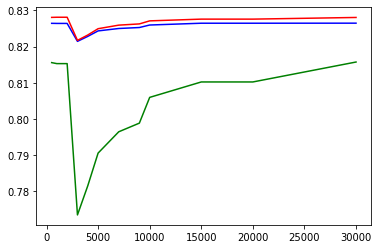

In [238]:
all_acc_test = []
all_acc_train = []
all_acc_train_all = []

for w in all_weights:    
    all_acc_test.append(get_accuracy_logistic(w , testY ,testF_sel))
    all_acc_train.append(get_accuracy_logistic(w , trainY ,trainF_sel))
    all_acc_train_all.append(get_accuracy_logistic(w , trainY_all ,trainF_sel_all))
    
plt.plot(all_steps , all_acc_train  ,c='b')
plt.plot(all_steps , all_acc_test   ,c='r')
plt.plot(all_steps , all_acc_train_all   ,c='g')
plt.show()